In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/gym_members_exercise_tracking_synthetic_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [5]:
df.dtypes
df['Max_BPM'] = pd.to_numeric(df['Max_BPM'], errors='coerce').astype('float64')

# Check the data type
print(df['Max_BPM'].dtype)

float64


In [6]:
df.shape

(1800, 15)

In [7]:
df.head(20)

# Q1: relationship between workout_frequency and BMI
# Q2: 根据gender来划分 男性的avg weight, BMI,calories burned, fat percentage, 女性的avg BMI, 画柱状图比较
# Q3: What's the real relationship between age and fitness decline?
#Do water intake patterns correlate with workout performance and recovery? 无显著差异
#Q4 Are there gender-specific patterns in workout preferences and outcomes?

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174.0,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166.0,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187.0,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187.0,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177.0,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83
5,38.0,Female,53.0,1.58,161.0,128.0,74.0,1.62,953.0,HIIT,23.4,2.5,2.0,2.0,13.02
6,44.0,Female,46.5,1.81,191.0,142.0,74.0,1.46,1238.0,Cardio,11.9,3.7,2.0,2.0,18.12
7,50.0,Female,88.5,1.63,181.0,136.0,63.0,1.63,829.0,Strength,11.6,1.8,4.0,2.0,19.16
8,18.0,Female,82.9,1.54,174.0,169.0,64.0,0.77,802.0,HIIT,27.8,2.2,3.0,1.0,49.84
9,34.0,Female,65.9,1.74,195.0,169.0,73.0,2.00,1231.0,Yoga,30.5,3.2,5.0,2.0,12.32


In [20]:
df.rename(columns={'Workout_Frequency (days/week)': 'Workout_Frequency','Weight (kg)':'Weight','Height (m)':'Height','Session_Duration (hours)':'Session_Duration','Water_Intake (liters)':'Water_Intake'}, inplace=True)

unique_categories = df['Workout_Type'].unique()
print(unique_categories)

['Strength' 'Cardio' 'HIIT' 'Yoga' nan '\\nStrength' '\\tCardio' '\\tYoga']


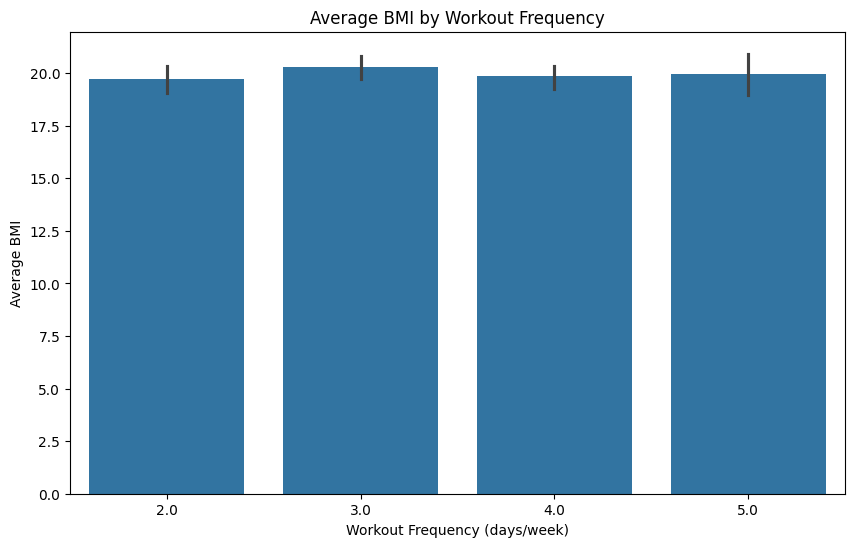

Average BMI by workout frequency:
Workout_Frequency
2.0    19.726596
3.0    20.279812
4.0    19.848018
5.0    19.972488
Name: BMI, dtype: float64


In [9]:
#Q1

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Workout_Frequency', y='BMI')
plt.title('Average BMI by Workout Frequency')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Average BMI')
plt.show()


avg_bmi_by_freq = df.groupby('Workout_Frequency')['BMI'].mean()
print("Average BMI by workout frequency:")
print(avg_bmi_by_freq)

In [10]:
#Q2, gender-based studies

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 100],
                        labels=['1-20', '20-30', '30-40', '40-50', '50+'])

# Group by gender and calculate means
gender_stats = df.groupby('Gender').agg({
    'Weight': 'mean',
    'BMI': 'mean',
    'Calories_Burned': 'mean',
    'Fat_Percentage': 'mean'
}).round(2)

print(gender_stats)

count_by_group = df.groupby(['Gender', 'Age_Group']).size().reset_index(name='Count')
print("\nNumber of people in each group:")
print(count_by_group)

        Weight    BMI  Calories_Burned  Fat_Percentage
Gender                                                
Female   68.11  19.71          1016.99           23.45
Male     67.20  20.24          1052.56           23.54

Number of people in each group:
   Gender Age_Group  Count
0  Female      1-20    122
1  Female     20-30    239
2  Female     30-40    195
3  Female     40-50    190
4  Female       50+    121
5    Male      1-20    163
6    Male     20-30    227
7    Male     30-40    174
8    Male     40-50    185
9    Male       50+    103


/tmp/ipython-input-10-3084063663.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_group = df.groupby(['Gender', 'Age_Group']).size().reset_index(name='Count')


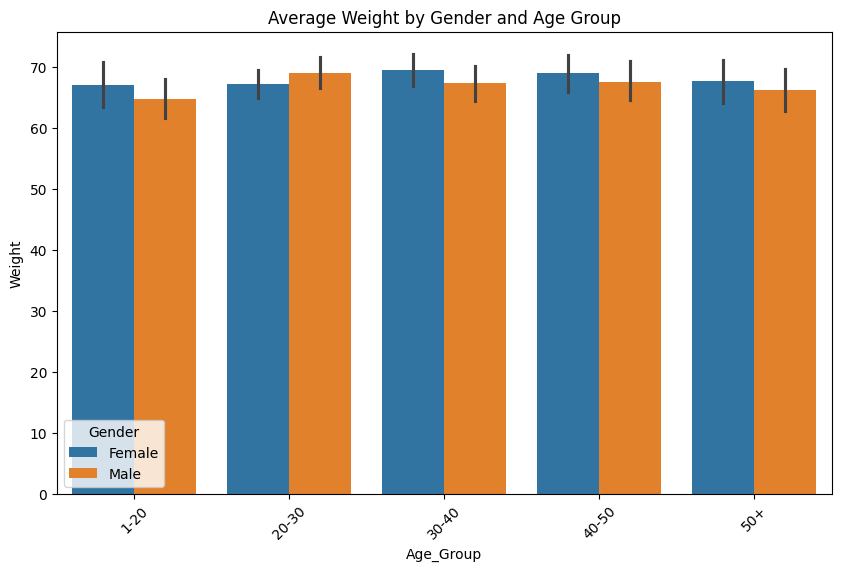

In [11]:
#visuals for avg weight for gender and age group

# Option 1: Average weight by gender and age group
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age_Group', y='Weight', hue='Gender')
plt.title('Average Weight by Gender and Age Group')
plt.xticks(rotation=45)
plt.show()

#from visuals we can tell, because all the people on the records they workout requenctly, so thier weight are maintaning in great range, but if you look closerly, you can tell starting from 30-40 till 50+ age groups, the avg weight of females are hihgher than males


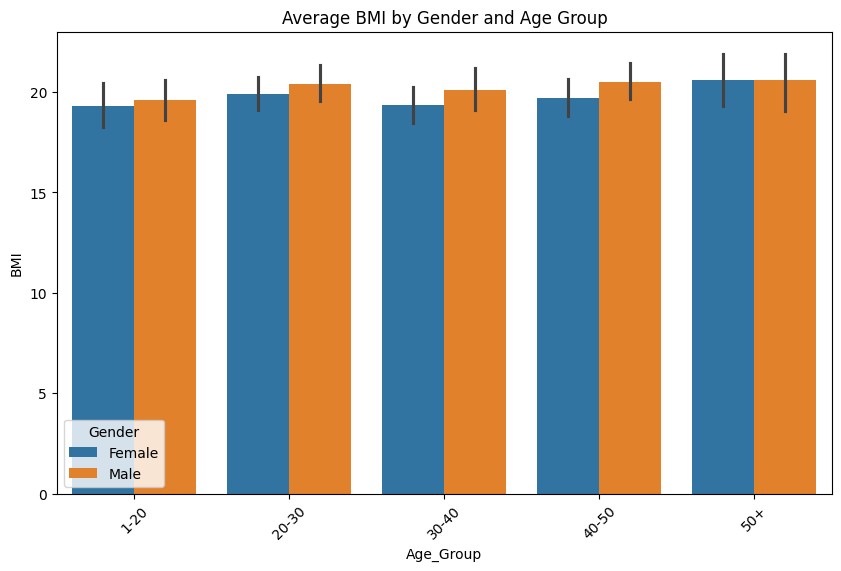

In [12]:
# Option 2: Average BMI by gender and age group
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age_Group', y='BMI', hue='Gender')
plt.title('Average BMI by Gender and Age Group')
plt.xticks(rotation=45)
plt.show()

#for BMI, male is dominately higher than females

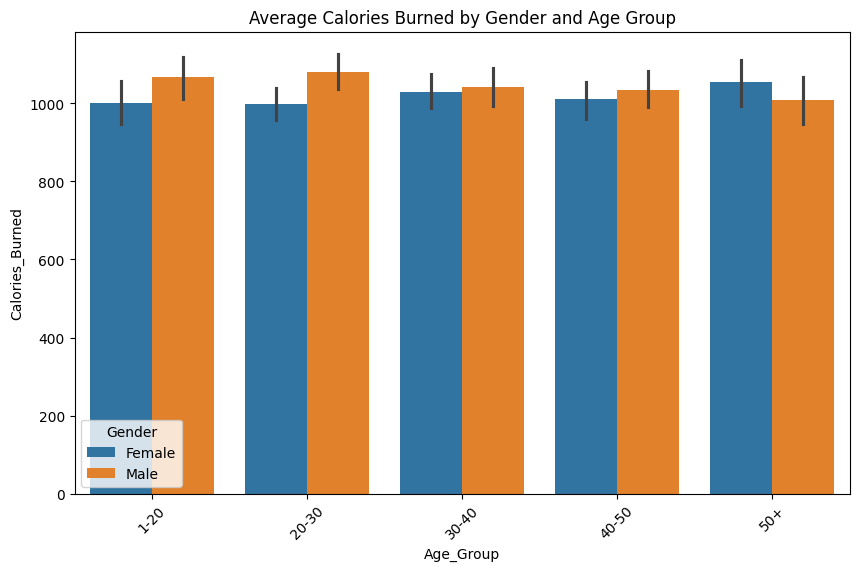

In [13]:
# Option 3: Average calories burned by gender and age group
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age_Group', y='Calories_Burned', hue='Gender')
plt.title('Average Calories Burned by Gender and Age Group')
plt.xticks(rotation=45)
plt.show()

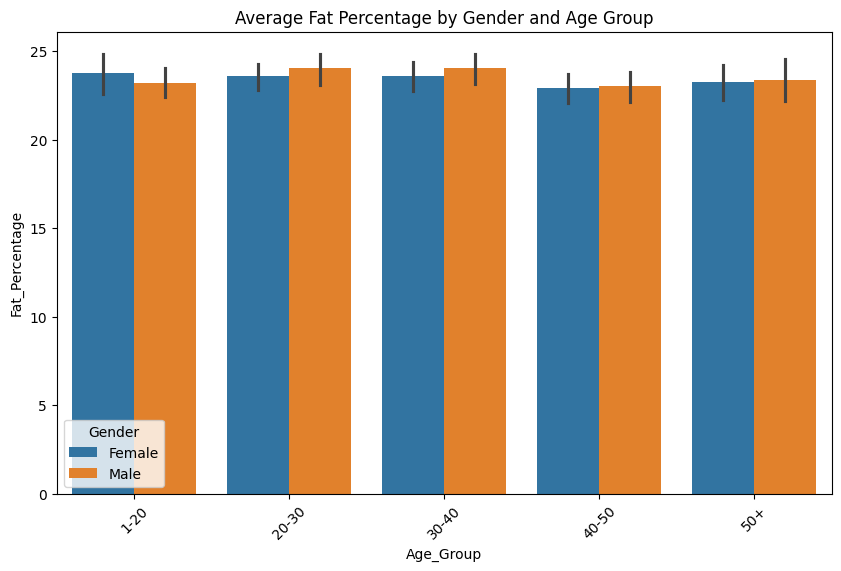

In [14]:
# Option 4: Average fat percentage by gender and age group
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age_Group', y='Fat_Percentage', hue='Gender')
plt.title('Average Fat Percentage by Gender and Age Group')
plt.xticks(rotation=45)
plt.show()

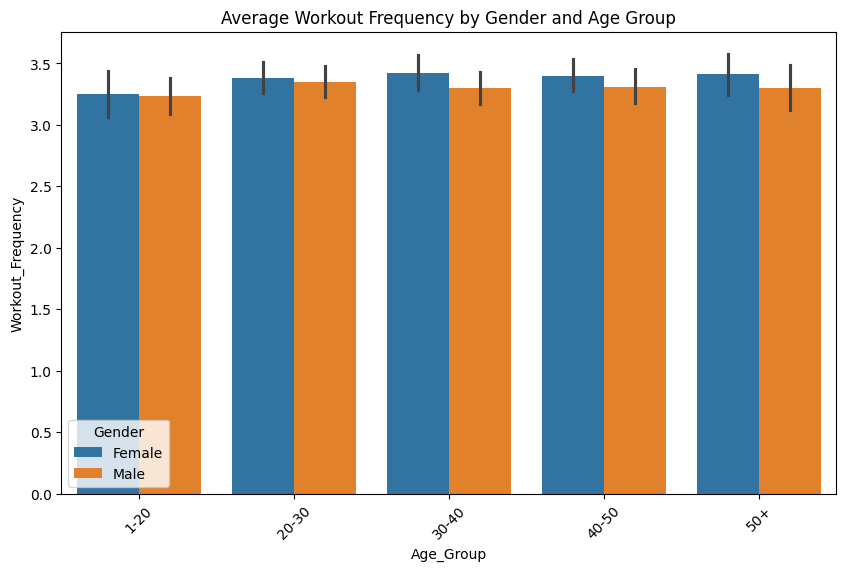

In [15]:
# Option 5: Average Workout_frequency by gender and age group
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age_Group', y='Workout_Frequency', hue='Gender')
plt.title('Average Workout Frequency by Gender and Age Group')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-16-2977727243.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby('Age_Group').agg({


           Max_BPM  Resting_BPM  Calories_Burned  Fat_Percentage    BMI  \
Age_Group                                                                 
15-25       180.08        63.71          1034.38           23.76  19.21   
26-35       180.14        63.94          1040.58           23.56  20.50   
36-45       180.75        64.30          1041.34           23.26  19.93   
46-55       180.06        63.91          1019.67           23.41  20.32   
56-65       179.00        63.82          1007.99           23.21  20.68   

           Workout_Frequency  
Age_Group                     
15-25                   3.28  
26-35                   3.38  
36-45                   3.35  
46-55                   3.36  
56-65                   3.34  


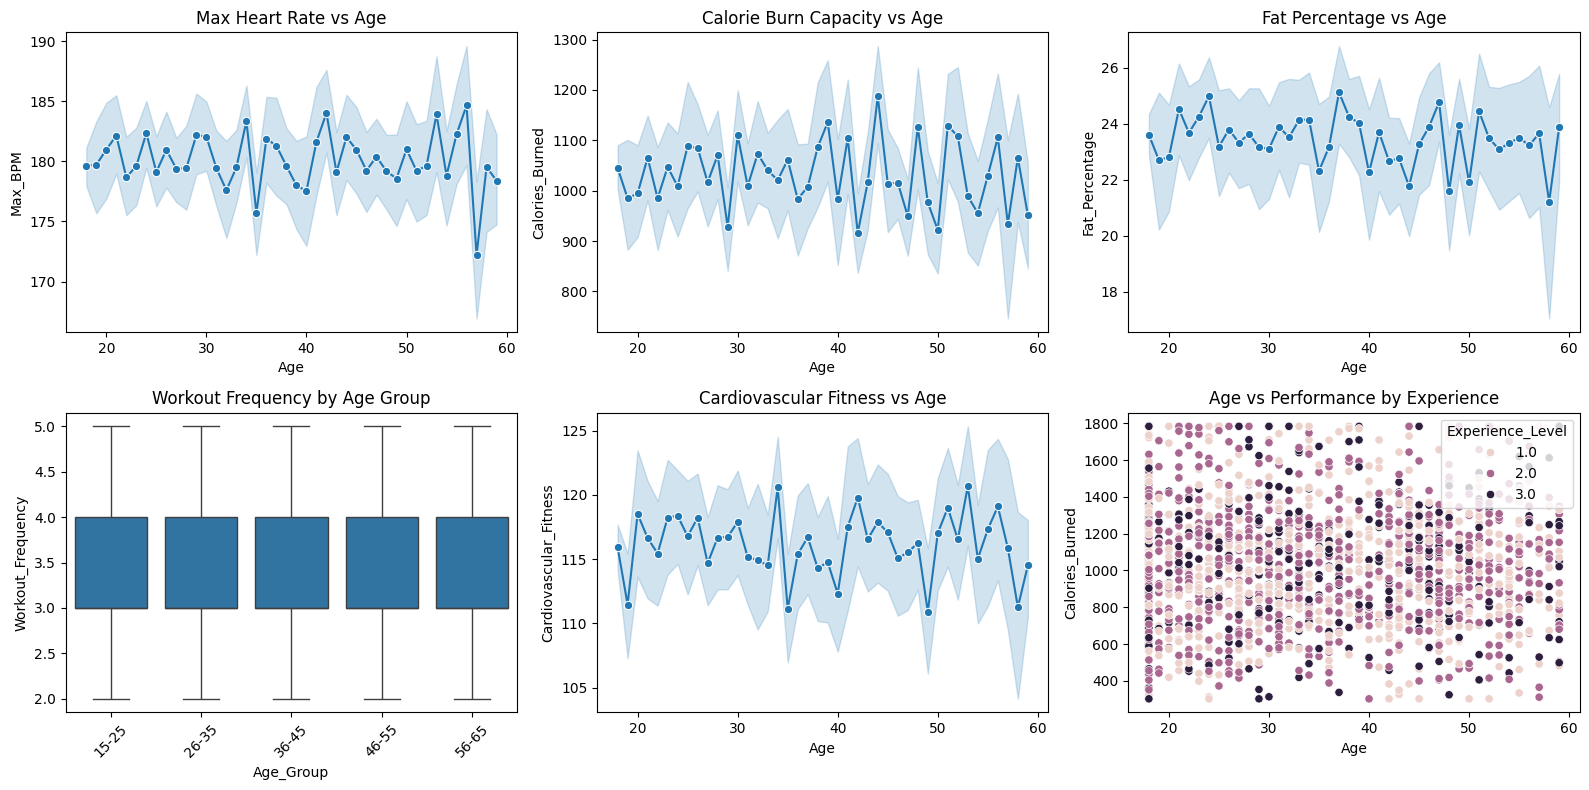

In [16]:
# What's the real relationship between age and fitness decline?

df['Age_Group'] = pd.cut(df['Age'], bins=[15, 25, 35, 45, 55, 65],
                        labels=['15-25', '26-35', '36-45', '46-55', '56-65'])

age_analysis = df.groupby('Age_Group').agg({
    'Max_BPM': 'mean',
    'Resting_BPM': 'mean',
    'Calories_Burned': 'mean',
    'Fat_Percentage': 'mean',
    'BMI': 'mean',
    'Workout_Frequency': 'mean'
}).round(2)

print(age_analysis)

# let's make charts regarding to each varible vs age
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
sns.lineplot(data=df, x='Age', y='Max_BPM', marker='o')
plt.title('Max Heart Rate vs Age')

plt.subplot(2, 3, 2)
sns.lineplot(data=df, x='Age', y='Calories_Burned', marker='o')
plt.title('Calorie Burn Capacity vs Age')

plt.subplot(2, 3, 3)
sns.lineplot(data=df, x='Age', y='Fat_Percentage', marker='o')
plt.title('Fat Percentage vs Age')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Age_Group', y='Workout_Frequency')
plt.title('Workout Frequency by Age Group')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
df['Cardiovascular_Fitness'] = df['Max_BPM'] - df['Resting_BPM']
sns.lineplot(data=df, x='Age', y='Cardiovascular_Fitness', marker='o')
plt.title('Cardiovascular Fitness vs Age')

plt.subplot(2, 3, 6)
sns.scatterplot(data=df, x='Age', y='Calories_Burned', hue='Experience_Level')
plt.title('Age vs Performance by Experience')

plt.tight_layout()
plt.show()

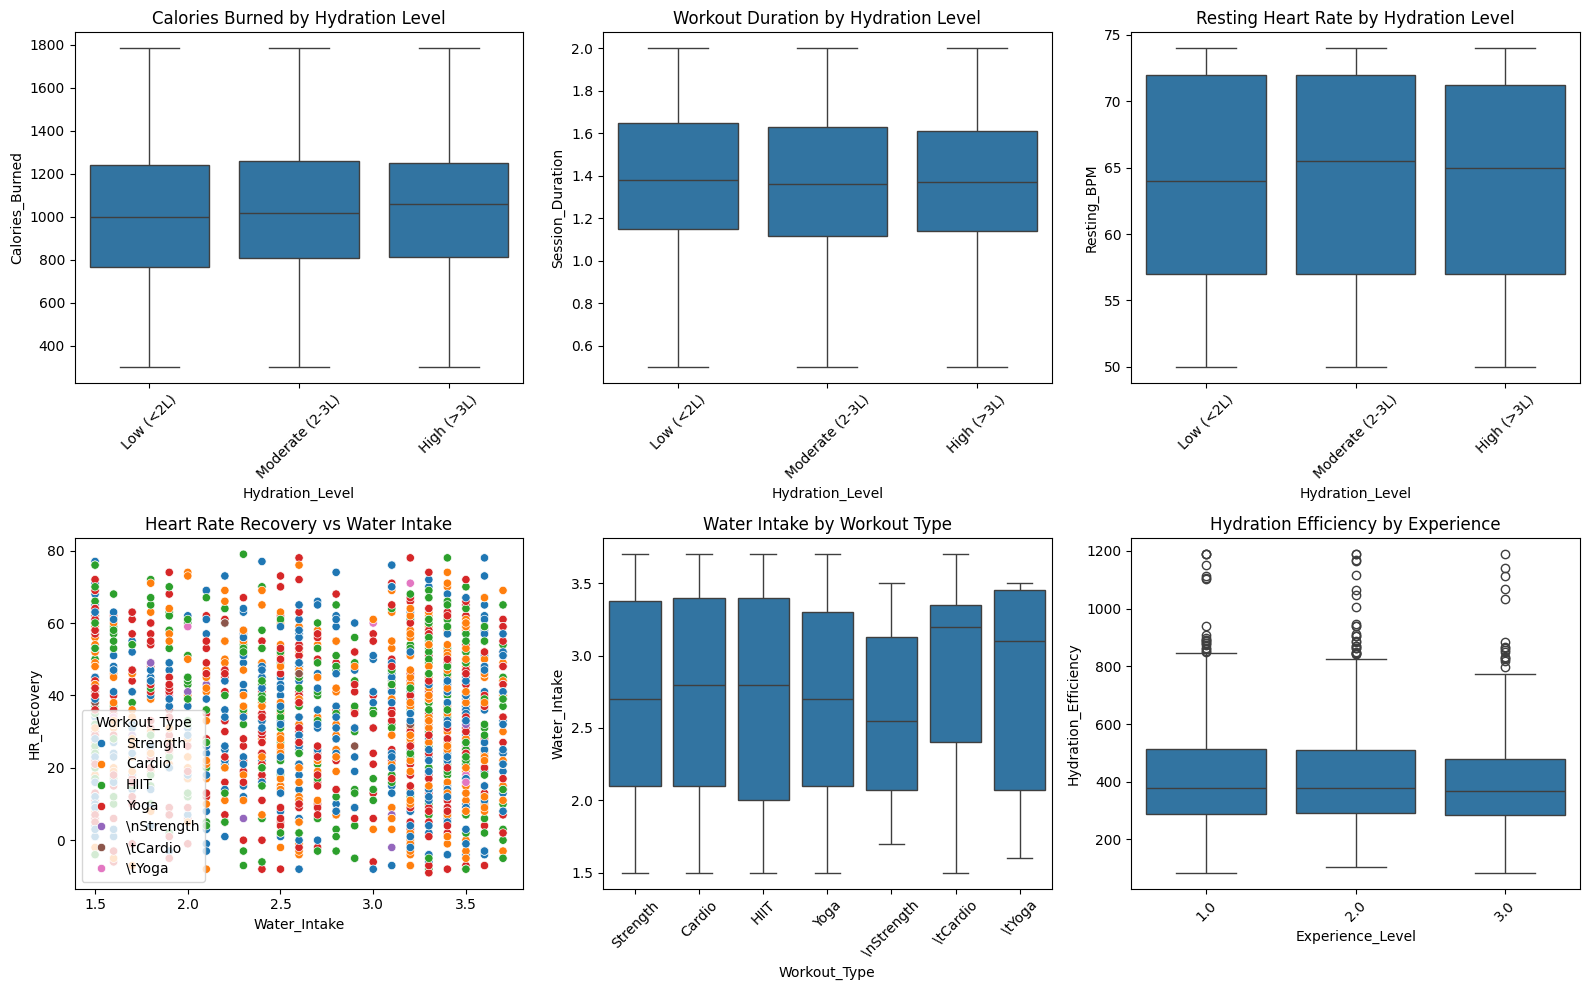

Performance metrics by hydration level:
                Calories_Burned         Session_Duration       Resting_BPM  \
                           mean     std             mean   std        mean   
Hydration_Level                                                              
Low (<2L)               1016.50  339.10             1.40  0.37       63.80   
Moderate (2-3L)         1036.75  328.01             1.39  0.38       64.15   
High (>3L)              1046.76  320.84             1.39  0.37       63.91   

                      Fat_Percentage        
                  std           mean   std  
Hydration_Level                             
Low (<2L)        8.00          23.91  5.57  
Moderate (2-3L)  7.96          22.87  6.04  
High (>3L)       7.90          23.77  5.87  


/tmp/ipython-input-17-120210820.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hydration_stats = df.groupby('Hydration_Level').agg({


In [17]:
# Do water intake patterns correlate with workout performance and recovery? 无显著差异


df['Hydration_Level'] = pd.cut(df['Water_Intake'],
                              bins=[0, 2, 3, 5],
                              labels=['Low (<2L)', 'Moderate (2-3L)', 'High (>3L)'])

# Hydration analysis
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='Hydration_Level', y='Calories_Burned')
plt.title('Calories Burned by Hydration Level')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Hydration_Level', y='Session_Duration')
plt.title('Workout Duration by Hydration Level')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Hydration_Level', y='Resting_BPM')
plt.title('Resting Heart Rate by Hydration Level')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
# Hydration vs heart rate recovery
df['HR_Recovery'] = df['Max_BPM'] - df['Avg_BPM']
sns.scatterplot(data=df, x='Water_Intake', y='HR_Recovery', hue='Workout_Type')
plt.title('Heart Rate Recovery vs Water Intake')

plt.subplot(2, 3, 5)
# Water intake patterns by workout type
sns.boxplot(data=df, x='Workout_Type', y='Water_Intake')
plt.title('Water Intake by Workout Type')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
# Hydration efficiency
df['Hydration_Efficiency'] = df['Calories_Burned'] / df['Water_Intake']
sns.boxplot(data=df, x='Experience_Level', y='Hydration_Efficiency')
plt.title('Hydration Efficiency by Experience')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Statistical analysis
hydration_stats = df.groupby('Hydration_Level').agg({
    'Calories_Burned': ['mean', 'std'],
    'Session_Duration': ['mean', 'std'],
    'Resting_BPM': ['mean', 'std'],
    'Fat_Percentage': ['mean', 'std']
}).round(2)
print("Performance metrics by hydration level:")
print(hydration_stats)

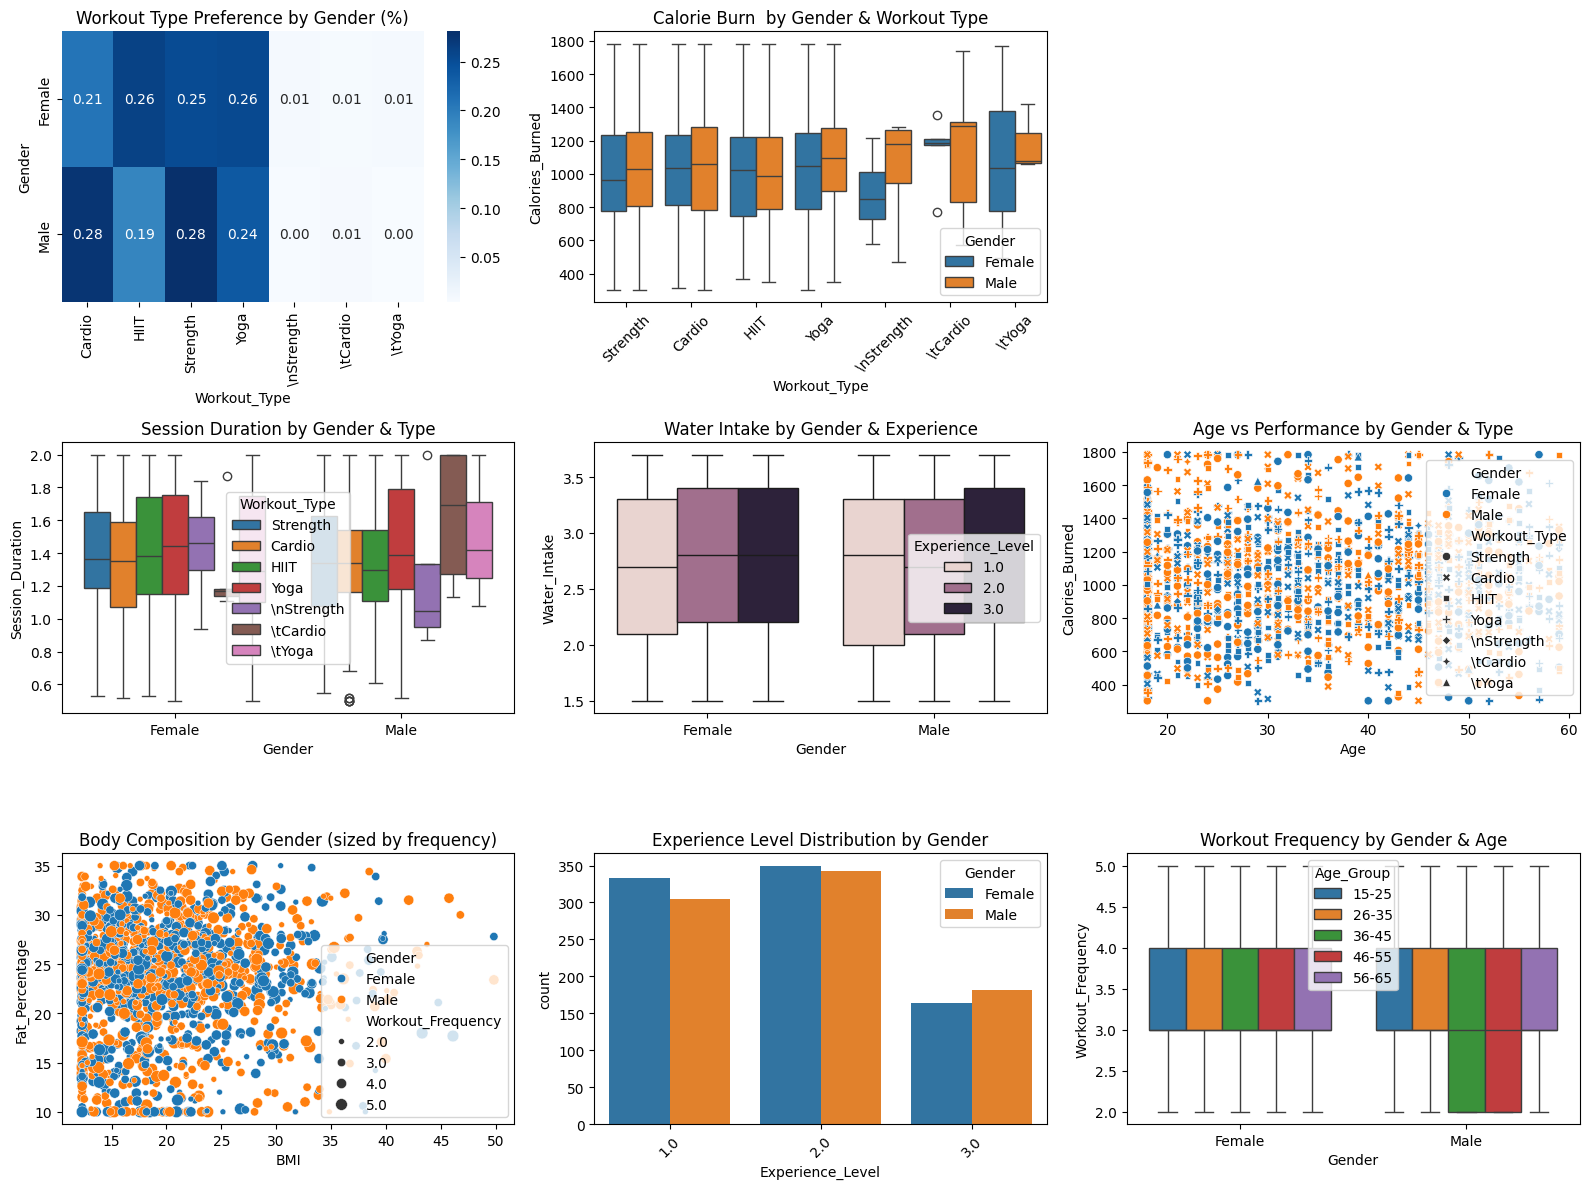

Gender comparison:
          Age    BMI  Fat_Percentage  Workout_Frequency  Session_Duration  \
Gender                                                                      
Female  35.09  19.71           23.45               3.38              1.40   
Male    33.91  20.24           23.54               3.30              1.38   

        Calories_Burned  Water_Intake  
Gender                                 
Female          1016.99          2.72  
Male            1052.56          2.70  


In [18]:
# Are there gender-specific patterns in workout preferences and outcomes?

plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
# Workout type preference by gender
workout_gender = pd.crosstab(df['Gender'], df['Workout_Type'])
workout_gender_pct = workout_gender.div(workout_gender.sum(axis=1), axis=0)
sns.heatmap(workout_gender_pct, annot=True, fmt='.2f', cmap='Blues')
plt.title('Workout Type Preference by Gender (%)')

plt.subplot(3, 3, 2)
# Calories burned efficiency by gender and workout type
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', hue='Gender')
plt.title('Calorie Burn  by Gender & Workout Type')
plt.xticks(rotation=45)



plt.subplot(3, 3, 4)
# Workout duration preferences
sns.boxplot(data=df, x='Gender', y='Session_Duration', hue='Workout_Type')
plt.title('Session Duration by Gender & Type')

plt.subplot(3, 3, 5)
# Water intake patterns
sns.boxplot(data=df, x='Gender', y='Water_Intake', hue='Experience_Level')
plt.title('Water Intake by Gender & Experience')

plt.subplot(3, 3, 6)
# Age vs performance by gender
sns.scatterplot(data=df, x='Age', y='Calories_Burned', hue='Gender', style='Workout_Type')
plt.title('Age vs Performance by Gender & Type')

plt.subplot(3, 3, 7)
# Body composition differences
sns.scatterplot(data=df, x='BMI', y='Fat_Percentage', hue='Gender', size='Workout_Frequency')
plt.title('Body Composition by Gender (sized by frequency)')

plt.subplot(3, 3, 8)
# Experience level distribution
sns.countplot(data=df, x='Experience_Level', hue='Gender')
plt.title('Experience Level Distribution by Gender')
plt.xticks(rotation=45)

plt.subplot(3, 3, 9)
# Workout frequency patterns
sns.boxplot(data=df, x='Gender', y='Workout_Frequency', hue='Age_Group')
plt.title('Workout Frequency by Gender & Age')

plt.tight_layout()
plt.show()

# Gender comparison statistics
gender_comparison = df.groupby('Gender').agg({
    'Age': 'mean',
    'BMI': 'mean',
    'Fat_Percentage': 'mean',
    'Workout_Frequency': 'mean',
    'Session_Duration': 'mean',
    'Calories_Burned': 'mean',
    'Water_Intake': 'mean'
}).round(2)
print("Gender comparison:")
print(gender_comparison)